In [25]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from keras.optimizers import Optimizer
from keras import optimizers
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


First of All I loaded my data using pandas. For this purpose I divided my data into two section: training and test 

In [2]:
!wget --no-check-certificate \
    https://raw.githubusercontent.com/mostafahadizadeh1991/Ship-power-prediction/main/Ship_sailing_performance_data_test.csv \
    -O Ship_sailing_performance_data_test.csv
!wget --no-check-certificate \
    https://raw.githubusercontent.com/mostafahadizadeh1991/Ship-power-prediction/main/Ship_sailing_performance_data_train.csv \
    -O Ship_sailing_performance_data_train.csv
df_train = pd.read_csv("Ship_sailing_performance_data_train.csv")
df_test = pd.read_csv("Ship_sailing_performance_data_test.csv")
#df_train = df_train.drop(['Unnamed: 0'], axis=1)
#df_test = df_test.drop(['Unnamed: 0'], axis=1)

--2021-03-29 13:43:38--  https://raw.githubusercontent.com/mostafahadizadeh1991/Ship-power-prediction/main/Ship_sailing_performance_data_test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15550 (15K) [text/plain]
Saving to: ‘Ship_sailing_performance_data_test.csv’

Ship_sailing_perfor 100%[===================>]  15.19K  --.-KB/s    in 0s      

2021-03-29 13:43:39 (34.9 MB/s) - ‘Ship_sailing_performance_data_test.csv’ saved [15550/15550]

--2021-03-29 13:43:39--  https://raw.githubusercontent.com/mostafahadizadeh1991/Ship-power-prediction/main/Ship_sailing_performance_data_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githu

In the next step, target ,ship’s propulsion power, for training and test data has been shown by y_train and y_test, respectively.

In [3]:
y_train = df_train['Power']
y_test = df_test['Power']
df_train = df_train.drop(['Power'], axis=1)
df_test = df_test.drop(['Power'], axis=1)

In [5]:
x_train = df_train.values
x_test = df_test.values

In [6]:
RF = RandomForestRegressor()

Now we should model our training using Random Forest machine learning method.

In [7]:
RF.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Here, we're gonna implement prediction over x_test data

In [9]:
y_pred = RF.predict(x_test)

In [12]:
maerandom = mean_absolute_error(y_test, y_pred)
maerandom

13.102686688560578

In the next step I used SGD machine learnoing method as my second approach to prediction of x_test data.

In [19]:
sgd = optimizers.SGD(lr=0.1, clipnorm = 1, nesterov = True)
model = Sequential()
model.add(Dense(256, input_dim = 10, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(loss='mean_absolute_error', optimizer='nadam')

In [16]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((291, 10), (291,), (125, 10), (125,))

In [20]:
model.fit(x_train, y_train, epochs=100, batch_size=100)

Epoch 1/100
3/3 [==============================] - 1s 6ms/step - loss: 9128.8796
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 8813.6023
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 8422.4106
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 7882.6688
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 7229.2156
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 6422.1437
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 5496.9095
Epoch 8/100
3/3 [==============================] - 0s 6ms/step - loss: 4346.5172
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 2912.1232
Epoch 10/100
3/3 [==============================] - 0s 4ms/step - loss: 1266.9357
Epoch 11/100
3/3 [==============================] - 0s 5ms/step - loss: 384.7425
Epoch 12/100
3/3 [==============================] - 0s 7ms/step - loss: 417.9961
Epoch 13/100
3/3 [=========

In [28]:
ypredSGD = model.predict(x_test)
maeSGD=mean_absolute_error(y_test, ypredSGD)
maeSGD

47.41325000199998

As the last approach in this assigment I used Linear regression for prediction of x_test data.

In [31]:
linear = LinearRegression()
linear.fit(x_train, y_train)
ypredlinear = linear.predict(x_test)
maelinear=mean_absolute_error(y_test, ypredlinear)
maelinear

1.8571171385701746e-06

In [29]:
meanlist = [maelinear, maeSGD,maerandom,]
name = ['Linear Regression', 'SGD','Random Forest',]

Text(0, 0.5, 'Mean Absolute Error')

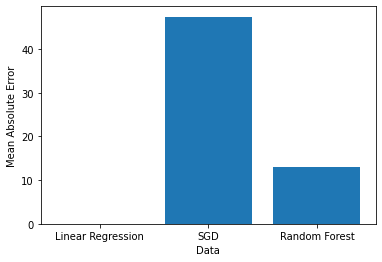

In [30]:
plt.bar(name,meanlist)
plt.xlabel("Data")
plt.ylabel("Mean Absolute Error")